<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.3: Measurements

In [1]:
## Import Libraries

import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### 1. Forward Feature Selection

> Forward Selection: Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.

Create a Regression model using Forward Feature Selection by looping over all the features adding one at a time until there are no improvements on the prediction metric ( R2  and  AdjustedR2  in this case).

#### 1.1 Load Diabetics Data Using datasets of sklearn

In [2]:
## Load the Diabetes Housing dataset

# Load the diabetes dataset from sklearn
diabetes = datasets.load_diabetes()

In [3]:
# Description
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [4]:
# Predictors
X = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


(array([  3.,  13.,  32.,  75.,  82., 119.,  63.,  30.,  17.,   8.]),
 array([-0.13776723, -0.11042932, -0.08309141, -0.05575351, -0.0284156 ,
        -0.0010777 ,  0.02626021,  0.05359811,  0.08093602,  0.10827393,
         0.13561183]),
 <a list of 10 Patch objects>)

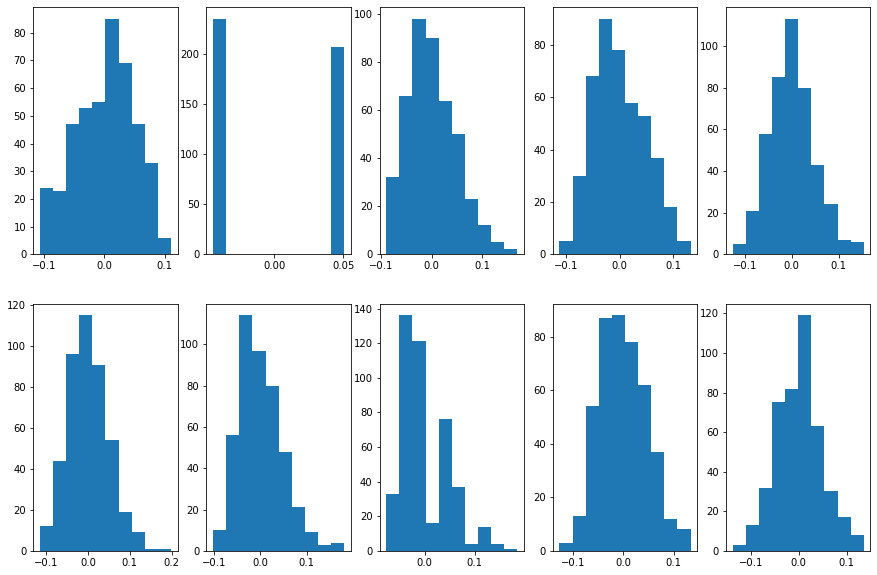

In [5]:
fig, ax = plt.subplots(2, 5, figsize=(15,10))

ax[0,0].hist(X.age)
ax[0,1].hist(X.sex)
ax[0,2].hist(X.bmi)
ax[0,3].hist(X.bp)
ax[0,4].hist(X.s1)
ax[1,0].hist(X.s2)
ax[1,1].hist(X.s3)
ax[1,2].hist(X.s4)
ax[1,3].hist(X.s5)
ax[1,4].hist(X.s6)

In [6]:
# Target
y = diabetes.target

In [7]:
## Create training and testing subsets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### 1.2 Use Forward Feature Selection to pick a good model

**Hint: Same as Lab 4.2.2**

- Add R^2 value in a list
- Add Adjusted R^2 in another list
- Display both R^2 and Adjusted R^2

In [8]:
## Flag intermediate output

show_steps = True   # for testing/debugging
# show_steps = False  # without showing steps

In [12]:
## Use Forward Feature Selection to pick a good model

included = []
best = {'feature': '', 'r2': 0, 'a_r2': 0} # keep track of model and parameters
model = LinearRegression()
n = X_test.shape[0] # get the number of cases in the test data for adjusted R2 calculation

r2_list = []
adjusted_r2_list = []

while True:
    changed = False
    if show_steps:
        print('')    
    excluded = list(set(X.columns) - set(included))    
    if show_steps:
        print(f'(E) Remaining Features: {excluded}')  
        
    for new_column in excluded:        
        if show_steps:
            print(f'(-) Trying {new_column}')
            print(f'(-) Current Features = {included + [new_column]}')           
        model.fit(X_train[included + [new_column]], y_train)
        r2 = model.score(X_train[included + [new_column]], y_train)        
        k = len(included + [new_column])
        adjusted_r2 = 1 - (((1 - r2)*(n -1)) / (n - k - 1))       
        
        if adjusted_r2 > best['a_r2']:
            best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
            changed = True
            if show_steps:
                print(f'(B) Best! R^2:{best["r2"]:.3f}, Adjusted R^2:{best["a_r2"]:.3f} ')                         
    if changed:
        included.append(best['feature'])
        r2_list.append(best['r2'])
        adjusted_r2_list.append(best['a_r2'])
        print(f'Added {best["feature"]}')
    else:
        break       
print('-' * 50)
print('Best Features:')
print(', '.join(included))
    


(E) Remaining Features: ['bmi', 's1', 's2', 's3', 's5', 's6', 'age', 's4', 'bp', 'sex']
(-) Trying bmi
(-) Current Features = ['bmi']
(B) Best! R^2:0.366, Adjusted R^2:0.358 
(-) Trying s1
(-) Current Features = ['s1']
(-) Trying s2
(-) Current Features = ['s2']
(-) Trying s3
(-) Current Features = ['s3']
(-) Trying s5
(-) Current Features = ['s5']
(-) Trying s6
(-) Current Features = ['s6']
(-) Trying age
(-) Current Features = ['age']
(-) Trying s4
(-) Current Features = ['s4']
(-) Trying bp
(-) Current Features = ['bp']
(-) Trying sex
(-) Current Features = ['sex']
Added bmi

(E) Remaining Features: ['s1', 's2', 's3', 's5', 's6', 'age', 's4', 'bp', 'sex']
(-) Trying s1
(-) Current Features = ['bmi', 's1']
(-) Trying s2
(-) Current Features = ['bmi', 's2']
(-) Trying s3
(-) Current Features = ['bmi', 's3']
(B) Best! R^2:0.399, Adjusted R^2:0.385 
(-) Trying s5
(-) Current Features = ['bmi', 's5']
(B) Best! R^2:0.458, Adjusted R^2:0.446 
(-) Trying s6
(-) Current Features = ['bmi', '

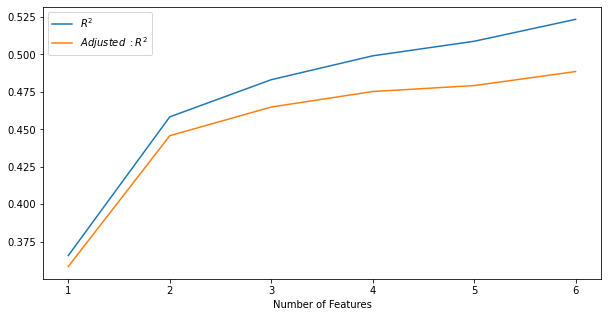

In [23]:
## Chart both R^2 and Adjusted R^2

_range = range(1, len(r2_list)+1)

plt.figure(figsize = (10, 5))

plt.plot(_range, r2_list, label = '$R^2$')
plt.plot(_range, adjusted_r2_list, label = '$Adjusted \: R^2$')
plt.xlabel('Number of Features')
plt.legend()
plt.show()

In [24]:
# Code Simplify (without show_steps)
included = []
best = {'feature': '', 'r2': 0, 'a_r2': 0} 
model = LinearRegression()
n = X_test.shape[0] 

while True:
    changed = False
    print('')
    excluded = list(set(X.columns) - set(included))    
              
    for new_column in excluded:                           
        model.fit(X_train[included + [new_column]], y_train)
        r2 = model.score(X_train[included + [new_column]], y_train)        
        k = len(included + [new_column])
        adjusted_r2 = 1 - (((1 - r2)*(n -1)) / (n - k - 1))       
        
        if adjusted_r2 > best['a_r2']:
            best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
            changed = True           
            print(f'(B) Best! Features:{best["feature"]}, R^2:{best["r2"]:.3f}, Adjusted R^2:{best["a_r2"]:.3f}')                         
   
    if changed:
        included.append(best['feature'])
        print(f'Added {best["feature"]}')
    else:
        break       

print(f'Best Features:{included}')


(B) Best! Features:bmi, R^2:0.366, Adjusted R^2:0.358
Added bmi

(B) Best! Features:s3, R^2:0.399, Adjusted R^2:0.385
(B) Best! Features:s5, R^2:0.458, Adjusted R^2:0.446
Added s5

(B) Best! Features:s1, R^2:0.472, Adjusted R^2:0.454
(B) Best! Features:bp, R^2:0.483, Adjusted R^2:0.465
Added bp

(B) Best! Features:s1, R^2:0.499, Adjusted R^2:0.475
Added s1

(B) Best! Features:s2, R^2:0.509, Adjusted R^2:0.479
Added s2

(B) Best! Features:sex, R^2:0.523, Adjusted R^2:0.489
Added sex

Best Features:['bmi', 's5', 'bp', 's1', 's2', 'sex']




---



---



> > > > > > > > > © 2019 Institute of Data


---



---



